In [73]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the uploaded Excel file
file_path = 'Mahasiswa Lulus Undip.xlsx'
xls = pd.ExcelFile(file_path)

# Display the sheet names to understand the structure of the file
xls.sheet_names


['Data Mahasiswa Lulus']

In [61]:
# Load the data from the "Data Mahasiswa Lulus" sheet
data_mahasiswa = xls.parse('Data Mahasiswa Lulus')

# Display the first few rows to inspect the data
data_mahasiswa.head()

,NIM,Nama,Gol UKT,Fakultas,Prodi,Tanggal Lulus,IPS1,IPS2,IPS3,IPS4,...,IPS8,IPK,Lama Studi,Tahun,bulan,Hari,Total Hari,Total Lama studi,Total Bulan,Total Tahun
0,24010314120050,WILDAN AZIZI,5,SAINS DAN MATEMATIKA,Informatika S1,11/01/2022,3.29,2.36,3.798265,2.64,...,2.33,2.91,7 tahun 4 bulan 10 hari,7,4,10,2685,"7 Tahun, 4 Bulan, 8 Hari",88,7.35
1,24010314120057,Rizal Muhamad,0,SAINS DAN MATEMATIKA,Informatika S1,05/10/2021,3.16,2.88,3.260000,2.95,...,1.20,3.38,7 tahun 1 bulan 3 hari,7,1,3,2588,"7 Tahun, 1 Bulan, 2 Hari",85,7.09
2,24010314120062,DENNIS LARASWATI,0,SAINS DAN MATEMATIKA,Informatika S1,31/12/2021,2.68,2.86,2.650000,2.32,...,0.67,2.93,7 tahun 3 bulan 29 hari,7,3,29,2674,"7 Tahun, 3 Bulan, 26 Hari",88,7.32
3,24010314130104,ZAENAL ARIFIN,4,SAINS DAN MATEMATIKA,Informatika S1,31/12/2021,2.12,2.05,2.550000,3.00,...,2.33,2.93,7 tahun 3 bulan 29 hari,7,3,29,2674,"7 Tahun, 3 Bulan, 26 Hari",88,7.32
4,24010314130106,NABILLA RAMADHANTI,4,SAINS DAN MATEMATIKA,Informatika S1,31/12/2021,3.47,3.12,3.120000,3.16,...,0.36,3.39,7 tahun 3 bulan 29 hari,7,3,29,2674,"7 Tahun, 3 Bulan, 26 Hari",88,7.32


In [66]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense


# Select relevant features (IPS1 - IPS8, IPK) as input
features = ['Gol UKT','IPS1', 'IPS2', 'IPS3', 'IPS4', 'IPS5', 'IPK']
X = data_mahasiswa[features]

# Total Hari as the target
y = data_mahasiswa['Total Tahun']

# Normalize the input features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Reshape the input for LSTM (samples, timesteps, features)
X_lstm = np.reshape(X_scaled, (X_scaled.shape[0], 1, X_scaled.shape[1]))

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_lstm, y, test_size=0.2, random_state=42)

# Build the LSTM model
model = Sequential()
model.add(GRU(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test), verbose=2)

# Evaluate the model
mse = model.evaluate(X_test, y_test, verbose=0)


# Predict the total days
y_pred = model.predict(X_test)

# Example: Print some predictions
for i in range(5):
    print(f"True: {y_test.iloc[i]}, Predicted: {y_pred[i][0]}")

print(f"Test Mean Squared Error: {mse}")


Epoch 1/200


/opt/homebrew/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 - 1s - 59ms/step - loss: 25.1237 - val_loss: 26.4507
Epoch 2/200
11/11 - 0s - 2ms/step - loss: 21.7842 - val_loss: 23.6739
Epoch 3/200
11/11 - 0s - 2ms/step - loss: 18.9236 - val_loss: 20.3220
Epoch 4/200
11/11 - 0s - 2ms/step - loss: 15.1900 - val_loss: 15.9101
Epoch 5/200
11/11 - 0s - 3ms/step - loss: 10.6477 - val_loss: 10.8368
Epoch 6/200
11/11 - 0s - 2ms/step - loss: 6.2004 - val_loss: 6.2923
Epoch 7/200
11/11 - 0s - 2ms/step - loss: 3.2129 - val_loss: 3.9587
Epoch 8/200
11/11 - 0s - 3ms/step - loss: 2.4772 - val_loss: 3.5361
Epoch 9/200
11/11 - 0s - 3ms/step - loss: 2.5545 - val_loss: 3.5108
Epoch 10/200
11/11 - 0s - 6ms/step - loss: 2.4680 - val_loss: 3.6088
Epoch 11/200
11/11 - 0s - 3ms/step - loss: 2.4079 - val_loss: 3.6106
Epoch 12/200
11/11 - 0s - 2ms/step - loss: 2.3874 - val_loss: 3.5493
Epoch 13/200
11/11 - 0s - 3ms/step - loss: 2.3624 - val_loss: 3.4695
Epoch 14/200
11/11 - 0s - 3ms/step - loss: 2.3350 - val_loss: 3.4566
Epoch 15/200
11/11 - 0s - 2ms/step - loss: 2

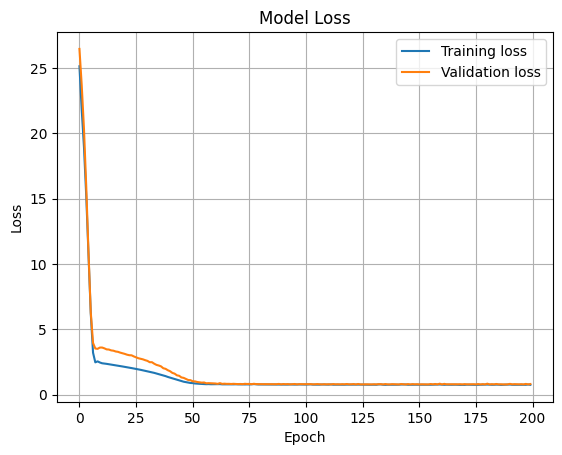

In [67]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

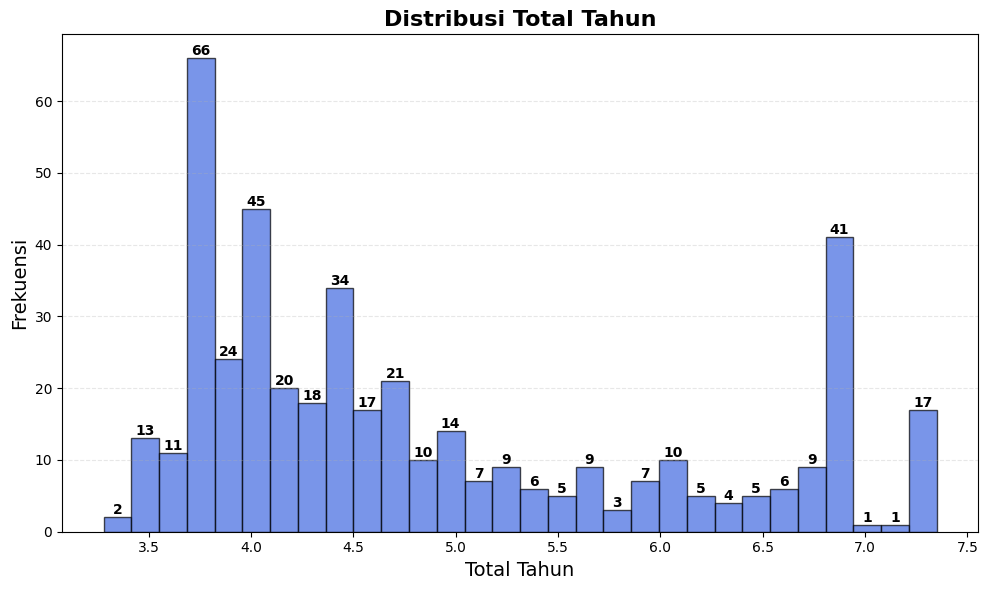

In [70]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(data_mahasiswa['Total Tahun'], bins=30, color='royalblue', edgecolor='black', alpha=0.7)

# Title and labels
plt.title('Distribusi Total Tahun', fontsize=16, fontweight='bold')
plt.xlabel('Total Tahun', fontsize=14)
plt.ylabel('Frekuensi', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Adding frequency labels on top of each bar
for i in range(len(n)):
    plt.text(bins[i] + (bins[i+1] - bins[i]) / 2,  # x-coordinate: center of each bin
             n[i],                                # y-coordinate: height of the bar
             int(n[i]),                           # label: frequency count
             ha='center', va='bottom',            # alignment
             fontweight='bold', fontsize=10,      # styling
             color='black')                       # text color

plt.tight_layout()
plt.show()

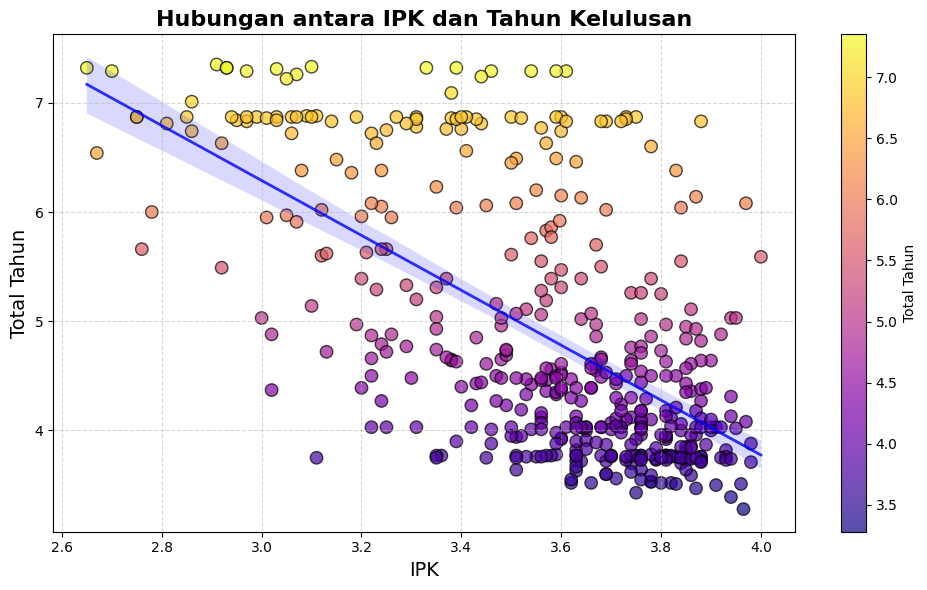

In [72]:
plt.figure(figsize=(10, 6))

# Scatter plot with color gradient based on 'Total Tahun'
scatter = plt.scatter(
    data_mahasiswa['IPK'], 
    data_mahasiswa['Total Tahun'], 
    c=data_mahasiswa['Total Tahun'],   # Color by 'Total Tahun'
    cmap='plasma',                    # Color map for gradient effect
    s=80,                              # Marker size
    alpha=0.7,                         # Transparency
    edgecolor='k'                      # Edge color for contrast
)

# Add a color bar to indicate what the color gradient represents
plt.colorbar(scatter, label='Total Tahun')

# Adding a trend line with Seaborn’s regression plot for clarity on the relationship
sns.regplot(
    x='IPK', 
    y='Total Tahun', 
    data=data_mahasiswa, 
    scatter=False,                     # Avoid re-plotting scatter
    color='blue',                      # Line color
    line_kws={'linewidth': 2, 'alpha': 0.8}  # Line styling
)

# Titles and labels with enhanced styling
plt.title('Hubungan antara IPK dan Tahun Kelulusan', fontsize=16, fontweight='bold')
plt.xlabel('IPK', fontsize=14)
plt.ylabel('Total Tahun', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)  # Light grid for background clarity

plt.tight_layout()
plt.show()

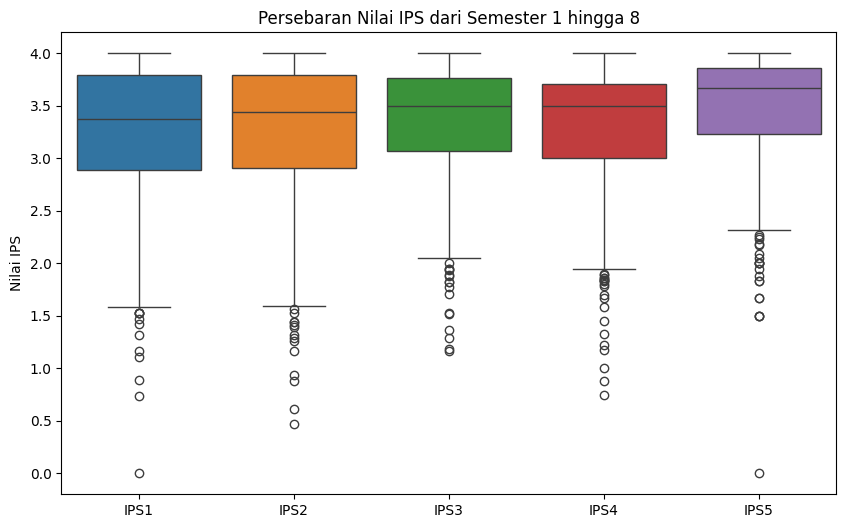

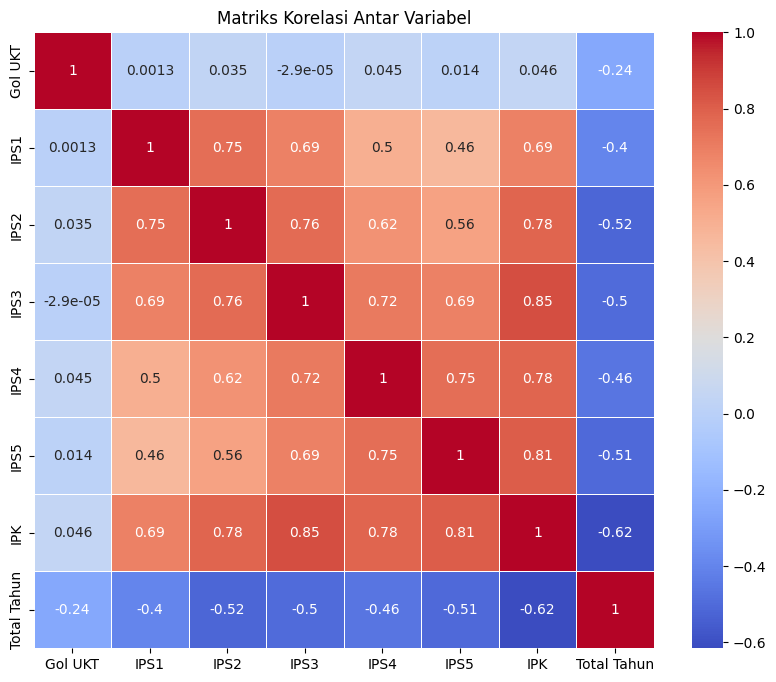

In [74]:

# 3. Box plot untuk persebaran nilai IPS1 hingga IPS8
plt.figure(figsize=(10,6))
sns.boxplot(data=data_mahasiswa[['IPS1', 'IPS2', 'IPS3', 'IPS4', 'IPS5']])
plt.title('Persebaran Nilai IPS dari Semester 1 hingga 8')
plt.ylabel('Nilai IPS')
plt.show()

# 4. Heatmap korelasi antar variabel
plt.figure(figsize=(10,8))
correlation_matrix = data_mahasiswa[['Gol UKT','IPS1', 'IPS2', 'IPS3', 'IPS4', 'IPS5', 'IPK', 'Total Tahun']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriks Korelasi Antar Variabel')
plt.show()


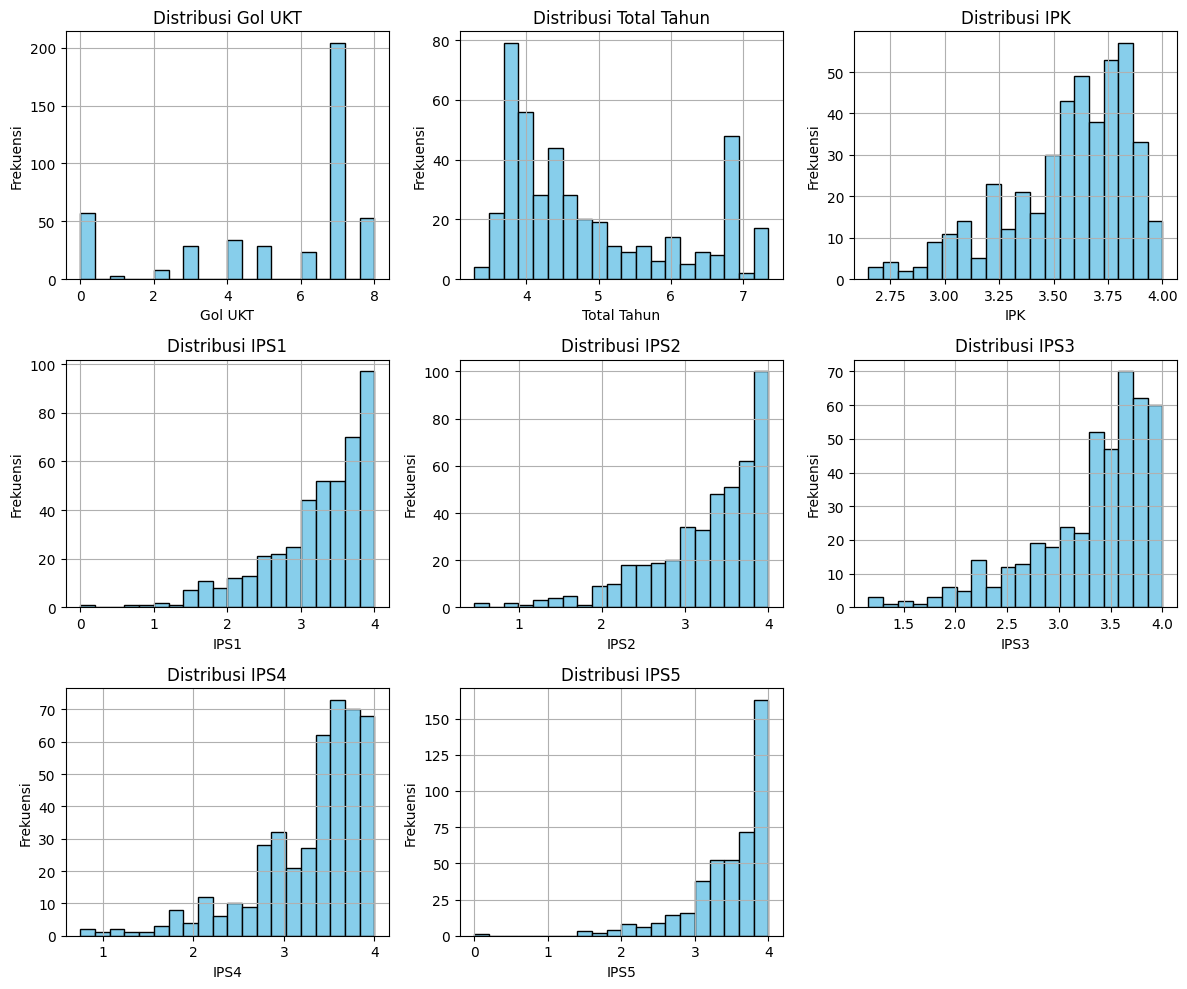

In [76]:
# Assuming data_mahasiswa is already loaded

# List of columns to plot distribution for
columns = ['Gol UKT','Total Tahun', 'IPK', 'IPS1', 'IPS2', 'IPS3', 'IPS4', 'IPS5']

# Plot histogram for each column
plt.figure(figsize=(12, 10))
for i, col in enumerate(columns, 1):
    plt.subplot(3, 3, i)  # 3x3 grid for up to 9 features
    plt.hist(data_mahasiswa[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.grid(True)

plt.tight_layout()
plt.show()

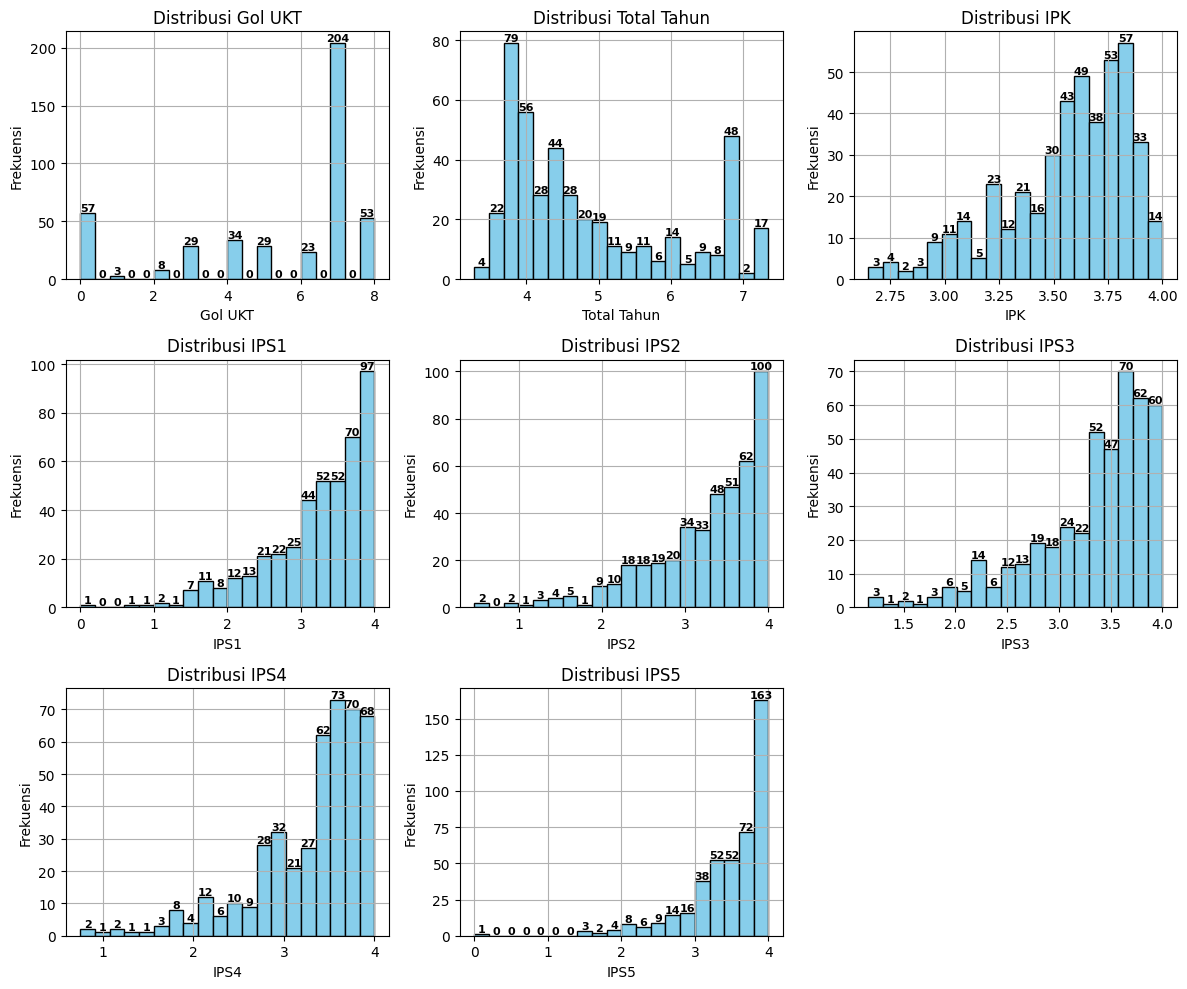

In [77]:
import matplotlib.pyplot as plt

# List of columns to plot distribution for
columns = ['Gol UKT', 'Total Tahun', 'IPK', 'IPS1', 'IPS2', 'IPS3', 'IPS4', 'IPS5']

# Plot histogram for each column
plt.figure(figsize=(12, 10))
for i, col in enumerate(columns, 1):
    plt.subplot(3, 3, i)  # 3x3 grid for up to 9 features
    
    # Plot histogram and capture bins and counts
    n, bins, patches = plt.hist(data_mahasiswa[col], bins=20, color='skyblue', edgecolor='black')
    
    # Set titles and labels
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.grid(True)
    
    # Adding frequency labels on top of each bar
    for j in range(len(n)):
        plt.text(bins[j] + (bins[j+1] - bins[j]) / 2,  # x-coordinate: center of each bin
                 n[j],                                # y-coordinate: height of the bar
                 int(n[j]),                           # label: frequency count
                 ha='center', va='bottom',            # alignment
                 fontweight='bold', fontsize=8,       # styling
                 color='black')                       # text color

plt.tight_layout()
plt.show()


In [79]:
!pip install mplcursors


[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: python3.10 -m pip install --upgrade pip


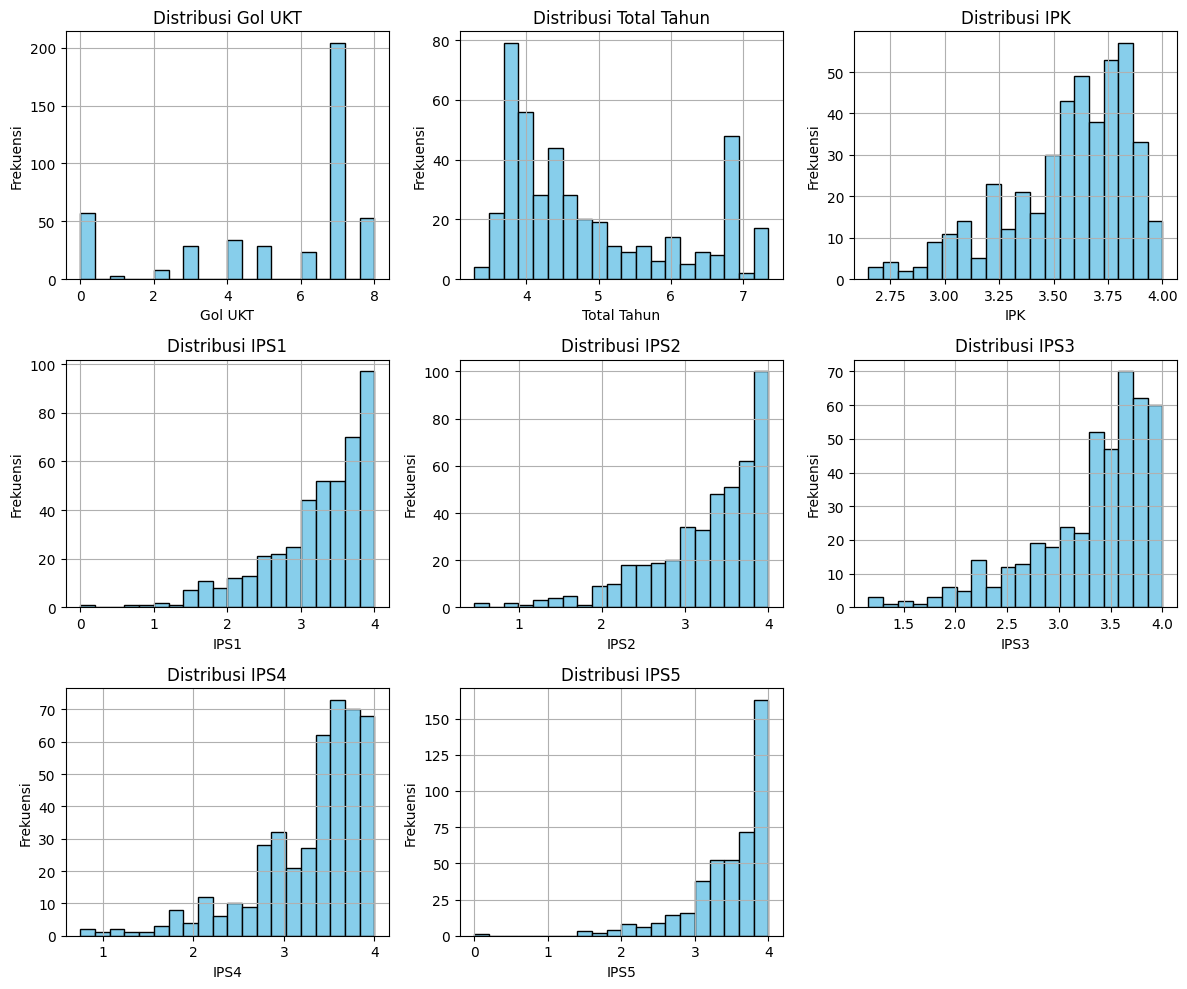

In [81]:
import matplotlib.pyplot as plt
import mplcursors

# List of columns to plot distribution for
columns = ['Gol UKT', 'Total Tahun', 'IPK', 'IPS1', 'IPS2', 'IPS3', 'IPS4', 'IPS5']

# Plot histogram for each column
plt.figure(figsize=(12, 10))
for i, col in enumerate(columns, 1):
    plt.subplot(3, 3, i)  # 3x3 grid for up to 9 features
    
    # Plot histogram
    n, bins, patches = plt.hist(data_mahasiswa[col], bins=20, color='skyblue', edgecolor='black')
    
    # Set titles and labels
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.grid(True)

    # Add hover functionality for each bar
    cursor = mplcursors.cursor(patches, hover=True)
    @cursor.connect("add")
    def on_add(sel):
        # Calculate the center position for the label on each bar
        bin_center = (bins[sel.index] + bins[sel.index + 1]) / 2
        # Display the frequency count when hovering
        sel.annotation.set(text=f'Frekuensi: {int(n[sel.index])}')
        sel.annotation.get_bbox_patch().set(fc="lightyellow", alpha=0.9)  # Style label background

plt.tight_layout()
plt.show()


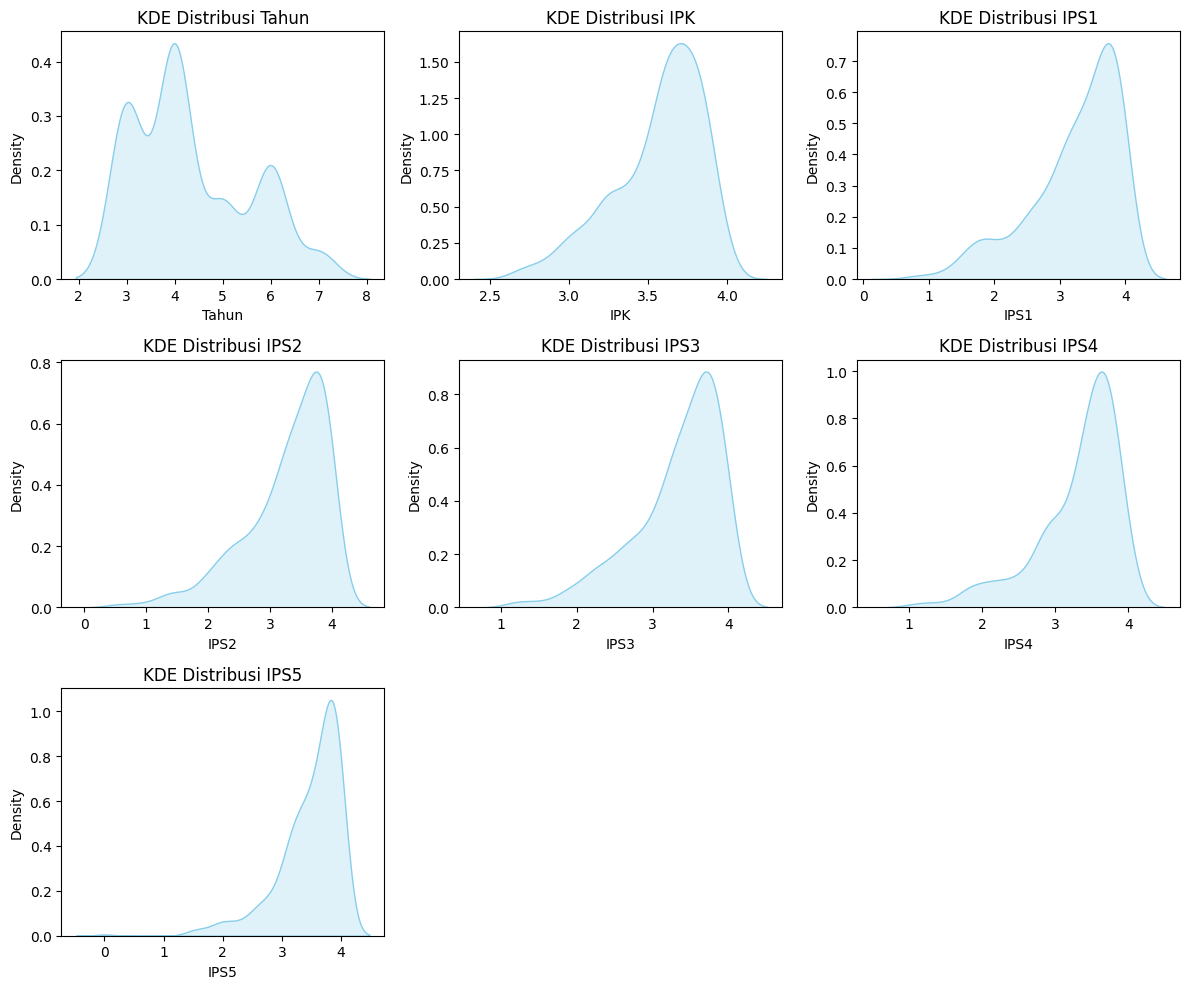

In [40]:
# List of columns to plot KDE for
columns = ['Tahun', 'IPK', 'IPS1', 'IPS2', 'IPS3', 'IPS4', 'IPS5']

plt.figure(figsize=(12, 10))
for i, col in enumerate(columns, 1):
    plt.subplot(3, 3, i)
    sns.kdeplot(data_mahasiswa[col], fill=True, color="skyblue")
    plt.title(f'KDE Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

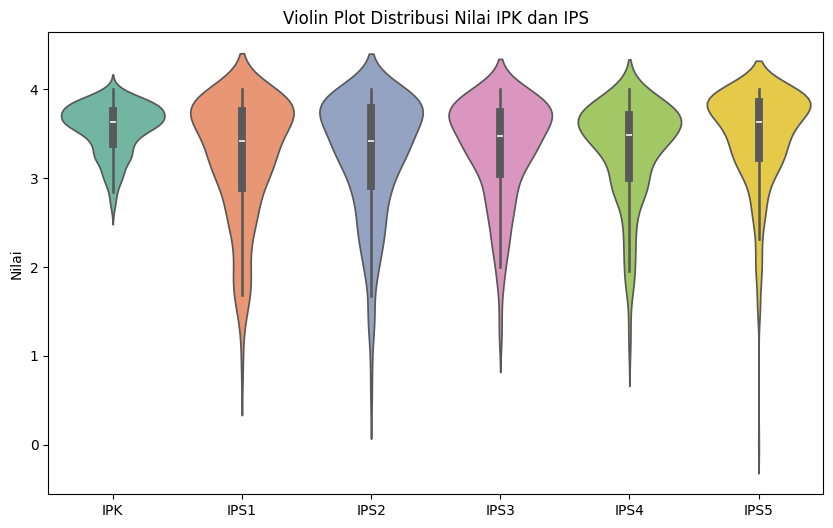

In [41]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=data_mahasiswa[['IPK', 'IPS1', 'IPS2', 'IPS3', 'IPS4', 'IPS5']], palette="Set2")
plt.title('Violin Plot Distribusi Nilai IPK dan IPS')
plt.ylabel('Nilai')
plt.show()

/opt/homebrew/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 47.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 28.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 28.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 31.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 38.9% of the points

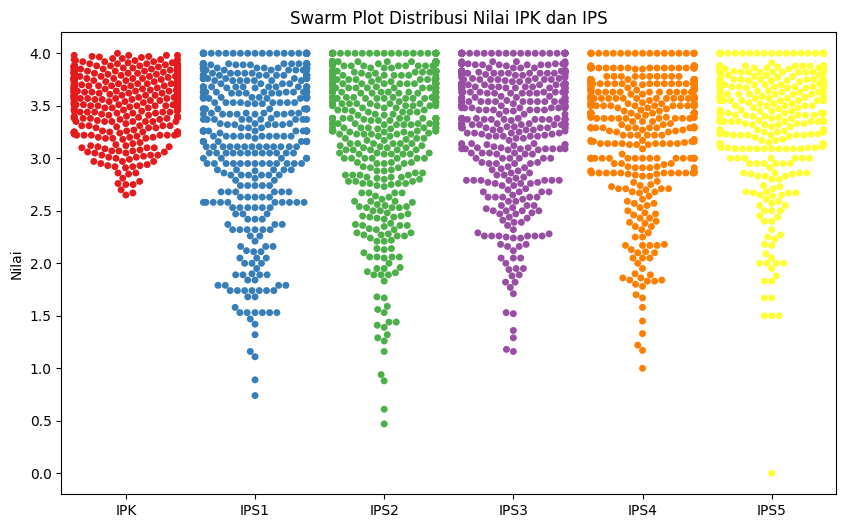

In [42]:
plt.figure(figsize=(10, 6))
sns.swarmplot(data=data_mahasiswa[['IPK', 'IPS1', 'IPS2', 'IPS3', 'IPS4', 'IPS5']], palette="Set1")
plt.title('Swarm Plot Distribusi Nilai IPK dan IPS')
plt.ylabel('Nilai')
plt.show()


/opt/homebrew/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 47.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 28.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 28.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 31.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 38.9% of the points

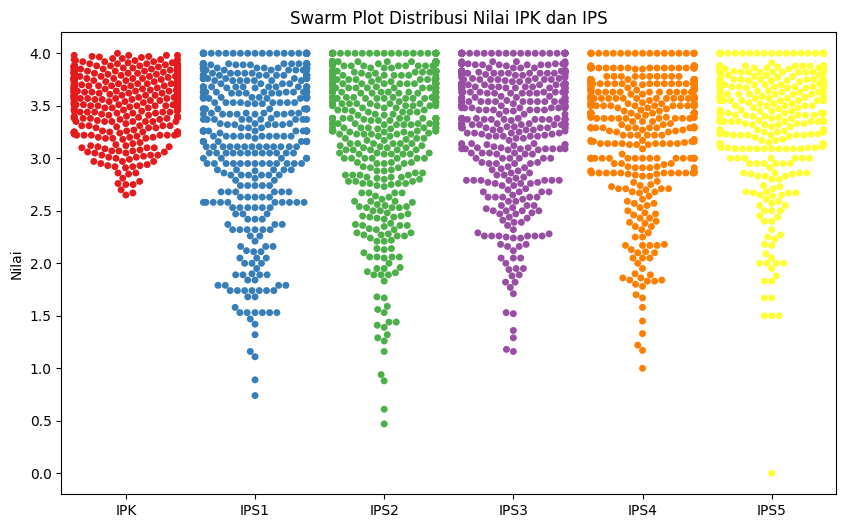

In [43]:
plt.figure(figsize=(10, 6))
sns.swarmplot(data=data_mahasiswa[['IPK', 'IPS1', 'IPS2', 'IPS3', 'IPS4', 'IPS5']], palette="Set1")
plt.title('Swarm Plot Distribusi Nilai IPK dan IPS')
plt.ylabel('Nilai')
plt.show()


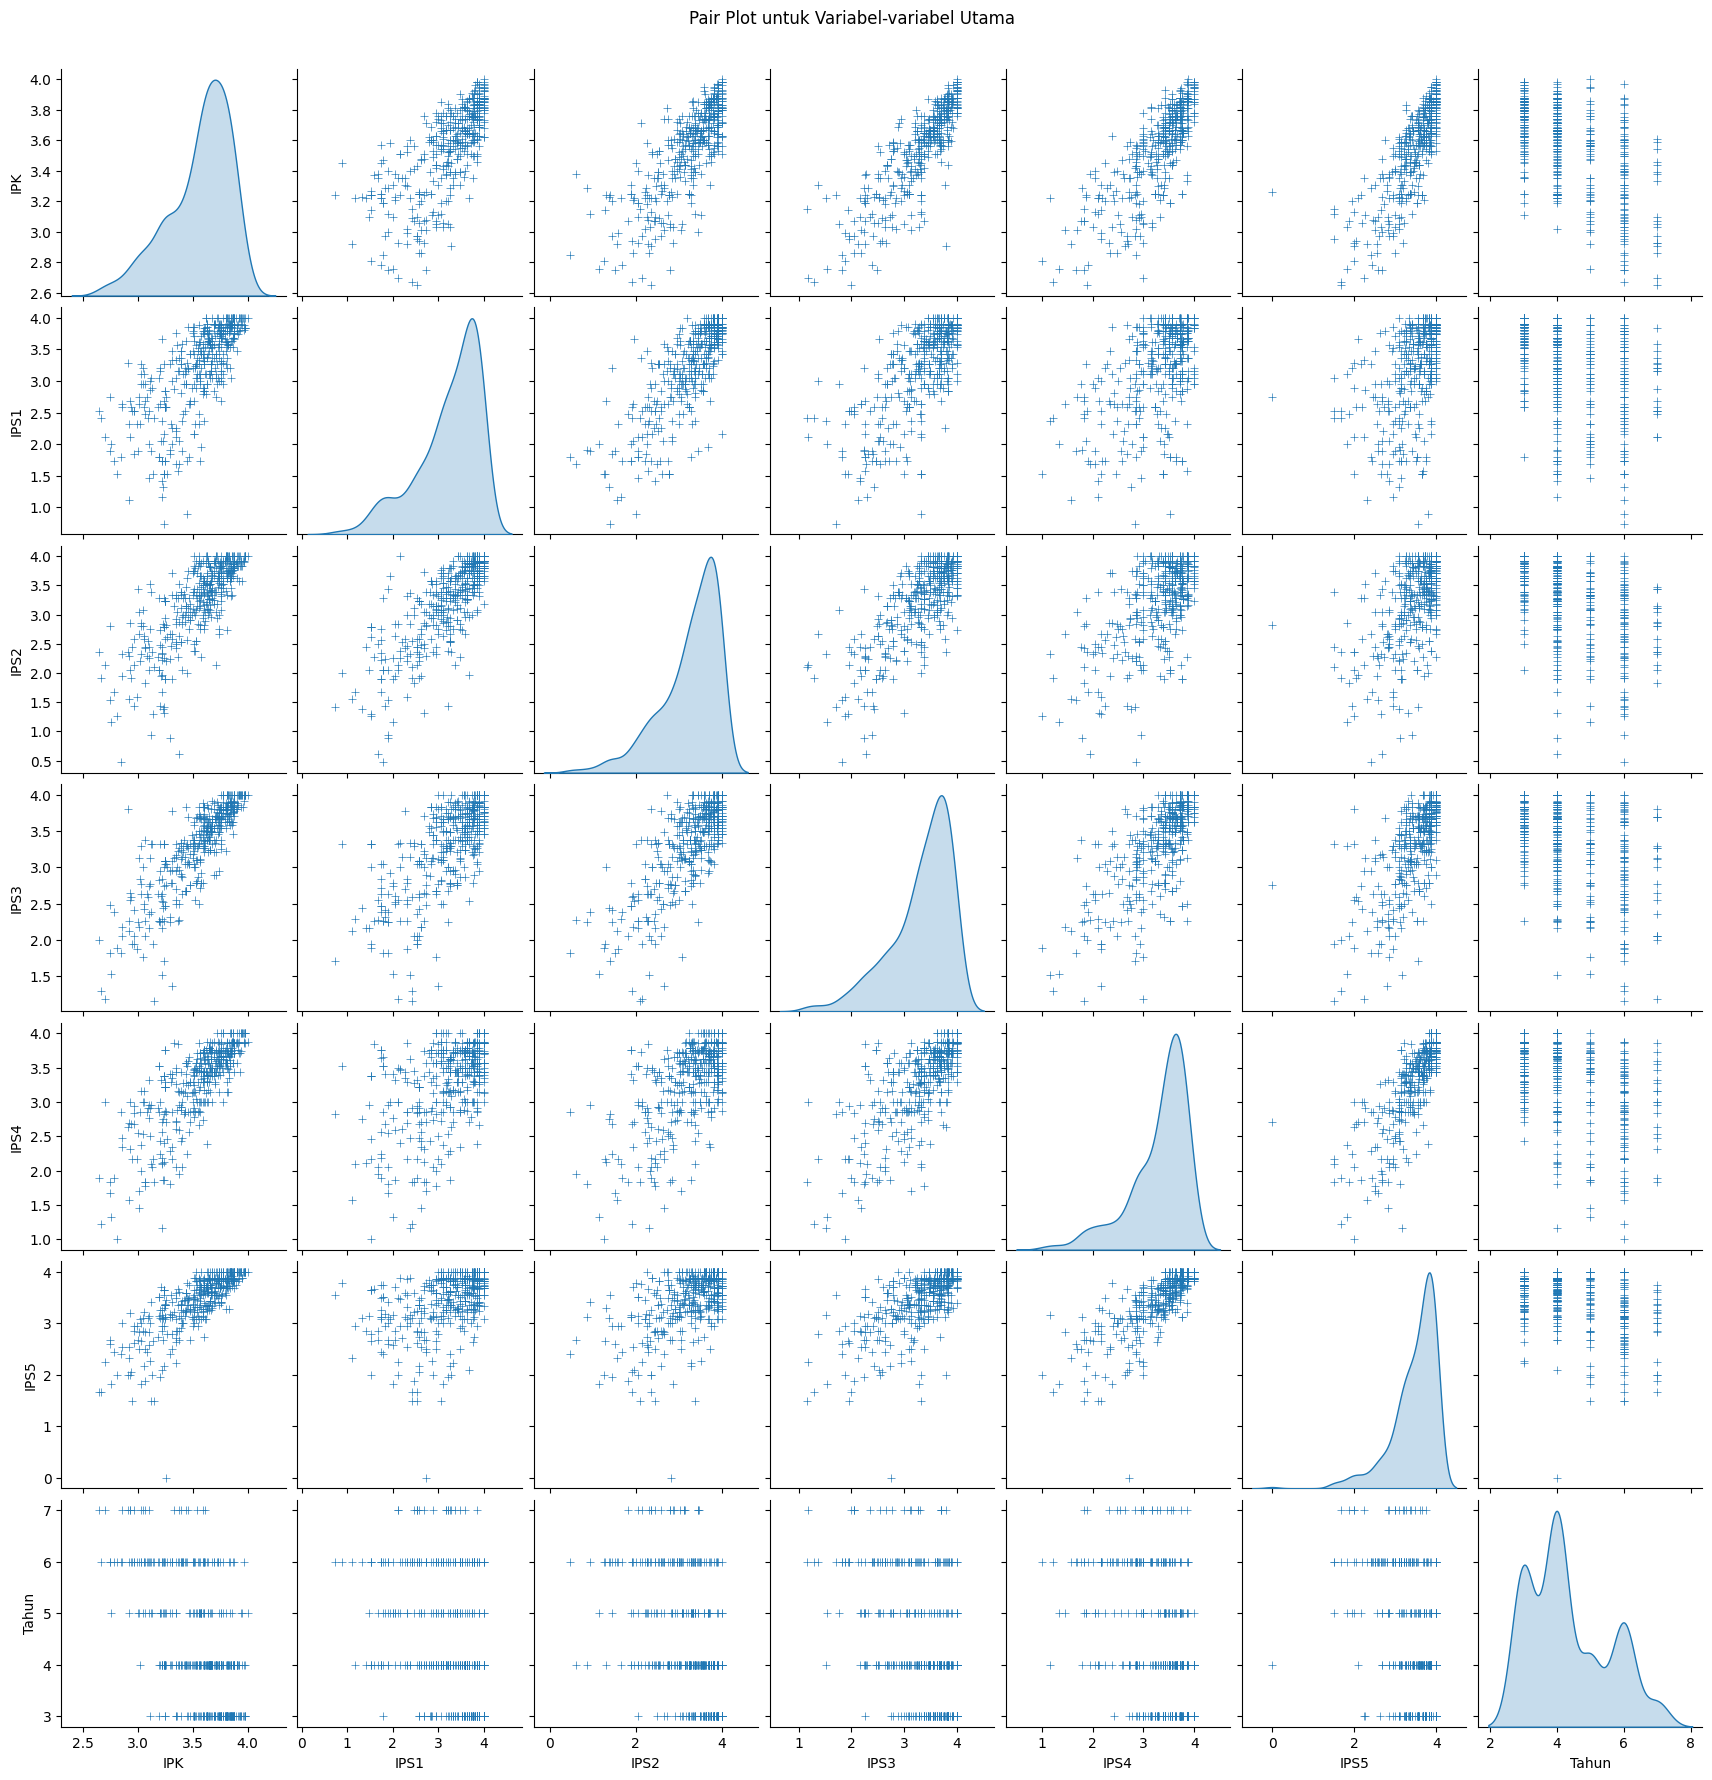

In [44]:
sns.pairplot(data_mahasiswa[['IPK', 'IPS1', 'IPS2', 'IPS3', 'IPS4', 'IPS5', 'Tahun']], diag_kind="kde", markers="+")
plt.suptitle('Pair Plot untuk Variabel-variabel Utama', y=1.02)
plt.show()


In [21]:
ips1 = 3.89
ips2 = 3.47
ips3 = 3.23
ips4 = 2.44
ips5 = 3.23
ipk = 3.86
test = [[ips1,ips2,ips3,ips4,ips5,ipk]]
test = np.array(test)

In [26]:
pred = model.predict(test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [27]:
pred

array([[1756.4679],
       [1749.8757],
       [1757.0671],
       [1753.817 ],
       [1756.4348],
       [1756.3215],
       [1749.6946],
       [1751.7722],
       [1756.2228],
       [1752.3535],
       [1753.7528],
       [1756.0662],
       [1756.4733],
       [1752.9214],
       [1757.1654],
       [1755.6598],
       [1757.1125],
       [1756.748 ],
       [1734.5469],
       [1755.6508],
       [1754.0656],
       [1756.7048],
       [1748.1213],
       [1757.264 ],
       [1756.7764],
       [1720.7097],
       [1757.0833],
       [1756.9652],
       [1756.9698],
       [1753.1602],
       [1756.8701],
       [1752.5798],
       [1756.9661],
       [1757.2471],
       [1754.4246],
       [1755.3174],
       [1757.174 ],
       [1748.2963],
       [1753.7078],
       [1756.462 ],
       [1756.5459],
       [1753.5983],
       [1751.366 ],
       [1756.7812],
       [1755.906 ],
       [1753.4364],
       [1755.9406],
       [1755.0085],
       [1743.0056],
       [1754.0515],
